# Demonstration notebook for the NHITS Project
## Import

In [1]:
# Import librairies
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the scripts
from src.model.NHITS_model import NHITS
from data.utils import create_rolling_windows, split_data
from src.training.training import train_model
from src.evaluation import evaluate_model
from data.data_preparation import prepare_data
import src.training.config as config

## Load config parameters

In [2]:
# Current parameters
current_config = config.HYPERPARAMETERS
print("Current config :")
for key, value in current_config.items():
    print(f"\t{key}: {value}")

Current config :
	horizon: 96
	m: 5
	batch_size: 256
	hidden_size: 512
	stacks: 3
	blocks_per_stack: 1
	pooling_kernel_sizes: [8, 4, 1]
	expressiveness_ratios: [168, 24, 1]
	learning_rate: 0.001
	learning_rate_decay: 0.5
	training_steps: 1000
	input_size: 480
	output_size: 96


## Modification of the parameters (optional)

In [3]:
# Example to change parameters directly inside the notebook
config.HYPERPARAMETERS['horizon'] = 192  # Modify horizon size 
config.HYPERPARAMETERS['pooling_kernel_size'] = [2, 2, 2]  # Modify pooling kernel size 
config.HYPERPARAMETERS['expressiveness_ratios'] = [8, 4, 1] # Modify expressiveness ratios

print("\nNew configuration :")
for key, value in config.HYPERPARAMETERS.items():
    print(f"\t{key}: {value}")


New configuration :
	horizon: 192
	m: 5
	batch_size: 256
	hidden_size: 512
	stacks: 3
	blocks_per_stack: 1
	pooling_kernel_sizes: [8, 4, 1]
	expressiveness_ratios: [8, 4, 1]
	learning_rate: 0.001
	learning_rate_decay: 0.5
	training_steps: 1000
	input_size: 480
	output_size: 96
	pooling_kernel_size: [2, 2, 2]


## Check and update the dataset's path

In [4]:
# Print the current path defined in config 
print(f"Current dataset path: {config.DATASET_PATH}")

# Ask user to enter a new path
new_path = input("Enter a new path for the dataset of your choice (or press enter to keep the current path):").strip()

# Check if the new path is valid
if new_path:  
    if os.path.exists(new_path):
        config.DATASET_PATH = new_path
        print(f"Updated path: {config.DATASET_PATH}")
    else:
        raise FileNotFoundError(f"The specified path is invalid: {new_path}")
else:
    if os.path.exists(config.DATASET_PATH):
        print("The default path is kept.")
    else:
        raise FileNotFoundError(f"The path is invalid: {new_path}")
    

Current dataset path: data/all_six_dataset/ETTm2.csv


Enter a new path for the dataset of your choice (or press enter to keep the current path): 


The default path is kept.


## Load the Dataset

In [5]:
# Load dataset
dataset_path = config.DATASET_PATH
try:
    dataset = pd.read_csv(dataset_path)
except FileNotFoundError:
    raise FileNotFoundError(f"Unable to load the dataset from: {dataset_path}")

# Check columns
if pd.to_datetime(dataset.iloc[:, 0], errors='coerce').notnull().all():
    dataset = dataset.drop(dataset.columns[0], axis=1)

print("\nColumns of the dataset:", dataset.columns)


Columns of the dataset: Index(['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT'], dtype='object')


## Run the model


Processing column: HUFL
Step 189/1000, Train Loss: 0.3066, Validation Loss: 0.3297
Step 378/1000, Train Loss: 0.2376, Validation Loss: 0.3249
Step 567/1000, Train Loss: 0.2170, Validation Loss: 0.3191
Step 756/1000, Train Loss: 0.2106, Validation Loss: 0.3153
Step 945/1000, Train Loss: 0.1976, Validation Loss: 0.3330
Step 1000/1000, Train Loss: 0.0593, Validation Loss: 0.3170
Horizon: 192 | Average MSE: 24.9520 | Average MAE: 35.5647


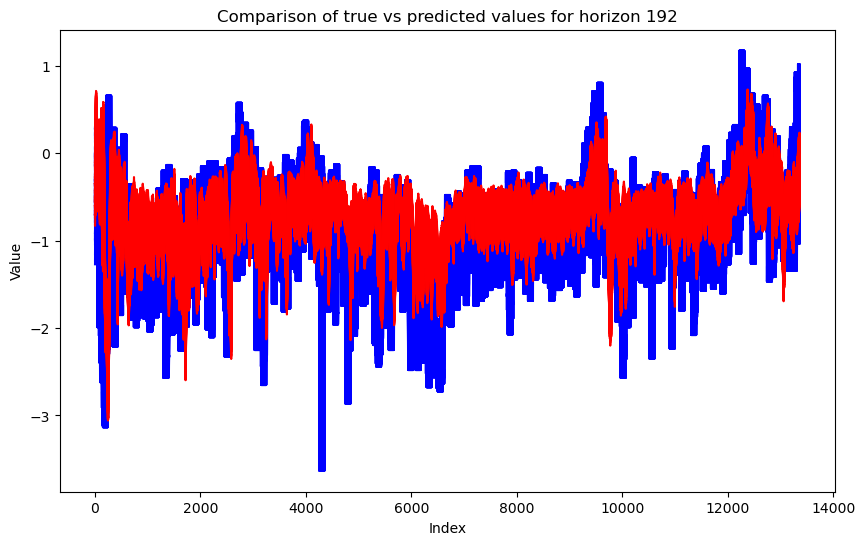


Processing column: HULL
Step 189/1000, Train Loss: 0.2117, Validation Loss: 0.2251
Step 378/1000, Train Loss: 0.1572, Validation Loss: 0.1707
Step 567/1000, Train Loss: 0.1435, Validation Loss: 0.1675
Step 756/1000, Train Loss: 0.1328, Validation Loss: 0.1754
Step 945/1000, Train Loss: 0.1278, Validation Loss: 0.1787
Step 1000/1000, Train Loss: 0.0368, Validation Loss: 0.1755
Horizon: 192 | Average MSE: 16.2772 | Average MAE: 28.5109


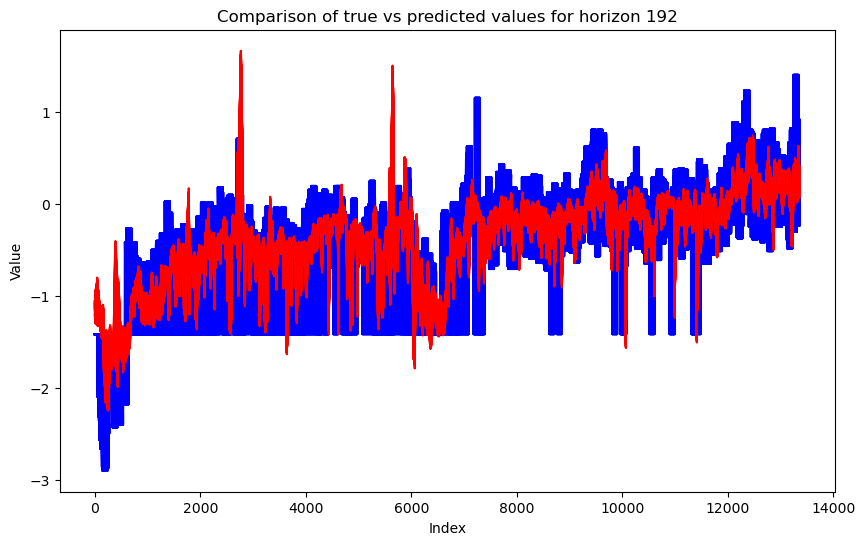


Processing column: MUFL
Step 189/1000, Train Loss: 0.1775, Validation Loss: 0.1809
Step 378/1000, Train Loss: 0.1150, Validation Loss: 0.1762
Step 567/1000, Train Loss: 0.1065, Validation Loss: 0.1832
Step 756/1000, Train Loss: 0.0972, Validation Loss: 0.1790
Step 945/1000, Train Loss: 0.0948, Validation Loss: 0.1872
Step 1000/1000, Train Loss: 0.0271, Validation Loss: 0.1823
Horizon: 192 | Average MSE: 11.1150 | Average MAE: 22.4504


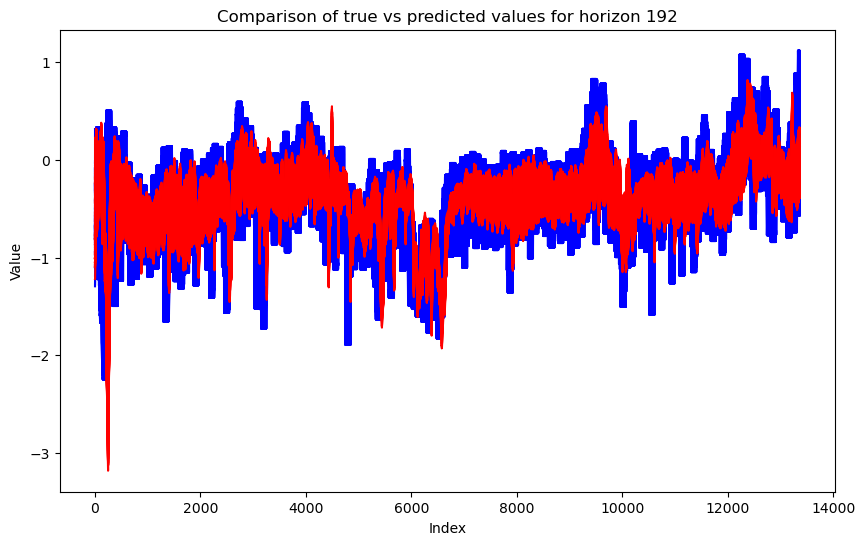


Processing column: MULL
Step 189/1000, Train Loss: 0.2148, Validation Loss: 0.2257
Step 378/1000, Train Loss: 0.1630, Validation Loss: 0.2321
Step 567/1000, Train Loss: 0.1537, Validation Loss: 0.2291
Step 756/1000, Train Loss: 0.1475, Validation Loss: 0.2330
Step 945/1000, Train Loss: 0.1430, Validation Loss: 0.2398
Step 1000/1000, Train Loss: 0.0405, Validation Loss: 0.2408
Horizon: 192 | Average MSE: 14.9774 | Average MAE: 27.9284


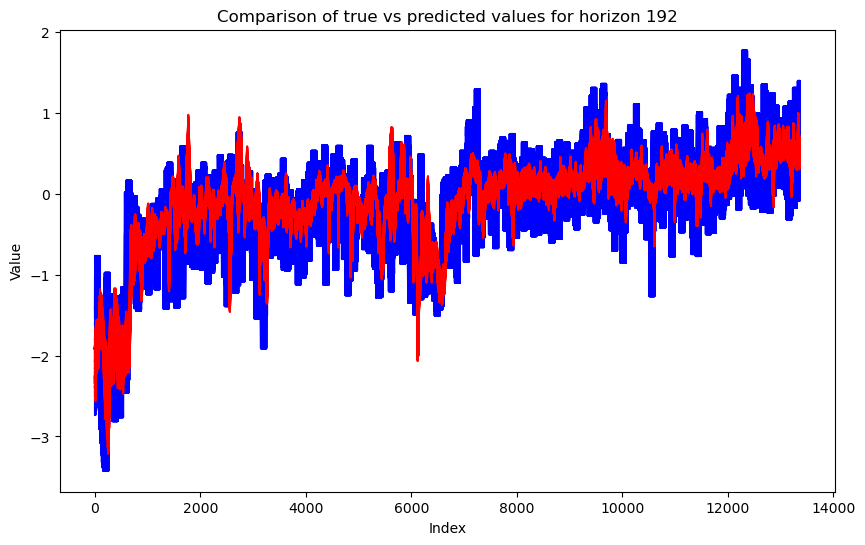


Processing column: LUFL
Step 189/1000, Train Loss: 0.0898, Validation Loss: 0.0791
Step 378/1000, Train Loss: 0.0547, Validation Loss: 0.0764
Step 567/1000, Train Loss: 0.0510, Validation Loss: 0.0792
Step 756/1000, Train Loss: 0.0482, Validation Loss: 0.0810
Step 945/1000, Train Loss: 0.0463, Validation Loss: 0.0798
Step 1000/1000, Train Loss: 0.0131, Validation Loss: 0.0771
Horizon: 192 | Average MSE: 3.3769 | Average MAE: 13.1810


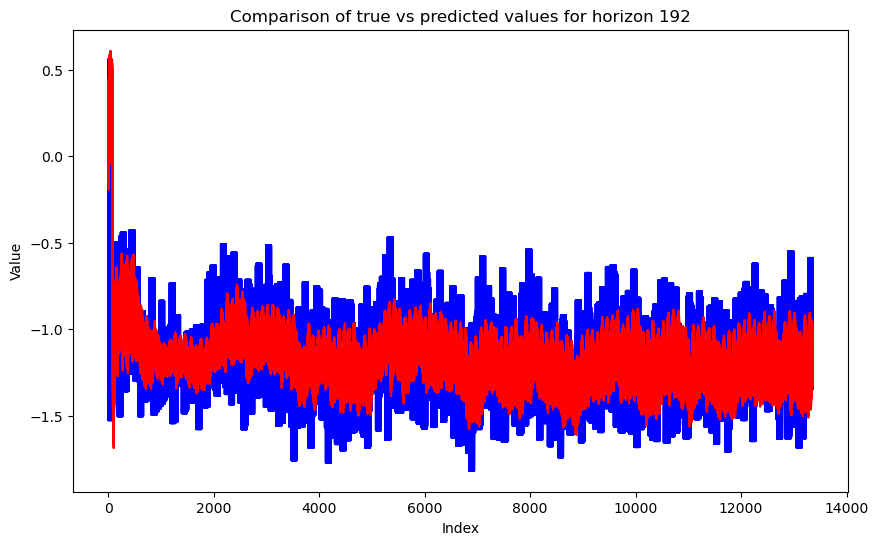


Processing column: LULL
Step 189/1000, Train Loss: 0.1514, Validation Loss: 0.0138
Step 378/1000, Train Loss: 0.0802, Validation Loss: 0.0138
Step 567/1000, Train Loss: 0.0735, Validation Loss: 0.0136
Step 756/1000, Train Loss: 0.0730, Validation Loss: 0.0136
Step 945/1000, Train Loss: 0.0733, Validation Loss: 0.0132
Step 1000/1000, Train Loss: 0.0224, Validation Loss: 0.0130
Horizon: 192 | Average MSE: 1.0555 | Average MAE: 7.6904


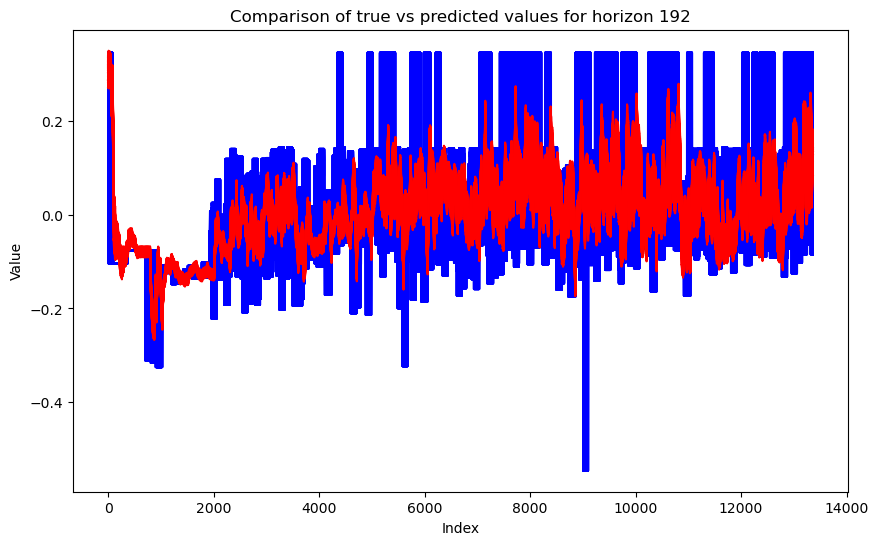


Processing column: OT
Step 189/1000, Train Loss: 0.1339, Validation Loss: 0.0718
Step 378/1000, Train Loss: 0.0864, Validation Loss: 0.0757
Step 567/1000, Train Loss: 0.0796, Validation Loss: 0.0599
Step 756/1000, Train Loss: 0.0745, Validation Loss: 0.0752
Step 945/1000, Train Loss: 0.0705, Validation Loss: 0.0733
Step 1000/1000, Train Loss: 0.0201, Validation Loss: 0.0633
Horizon: 192 | Average MSE: 11.1603 | Average MAE: 23.7030


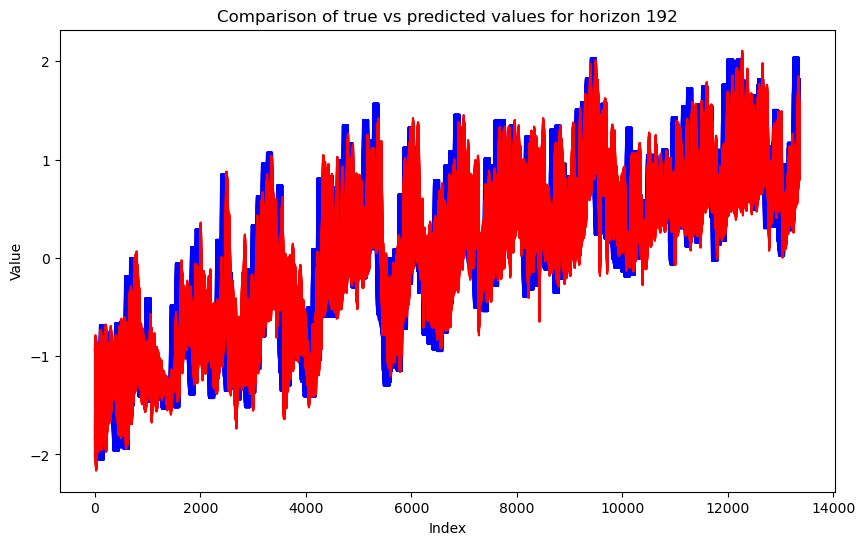

In [7]:
# Loop on the columns of the dataset
mse_list = []
mae_list = []

for column_name in dataset.columns:
    print(f"\nProcessing column: {column_name}")
    data = dataset[column_name]

    # Data preparation
    train_loader, val_loader, test_loader = prepare_data(
        data,
        config.HYPERPARAMETERS['input_size'],
        config.HYPERPARAMETERS['output_size'],
        config.HYPERPARAMETERS['batch_size']
    )

    # Initialization of the model
    model = NHITS(
        input_size=config.HYPERPARAMETERS['input_size'],
        output_size=config.HYPERPARAMETERS['output_size'],
        stacks=config.HYPERPARAMETERS['stacks'],
        blocks_per_stack=config.HYPERPARAMETERS['blocks_per_stack'],
        pooling_kernel_sizes=config.HYPERPARAMETERS['pooling_kernel_sizes'],
        hidden_size=config.HYPERPARAMETERS['hidden_size'],
        expressiveness_ratios=config.HYPERPARAMETERS['expressiveness_ratios']
    )

    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=config.HYPERPARAMETERS['learning_rate'])
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size= config.HYPERPARAMETERS['training_steps'] // 3, gamma=config.HYPERPARAMETERS['learning_rate_decay'])
    
    # Training 
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_model(
        model,
        train_loader,
        val_loader,
        training_steps=config.HYPERPARAMETERS['training_steps'],
        criterion=criterion,
        optimizer=optimizer,
        scheduler=scheduler,
        device=device
    )
    
    # Evaluation 
    mse, mae = evaluate_model(model, test_loader, config.HYPERPARAMETERS['horizon'], device)
    mse_list.append(mse)
    mae_list.append(mae)

## Results


Average MSE across all columns: 11.844912576585171
Average MAE across all columns: 22.718392916894363


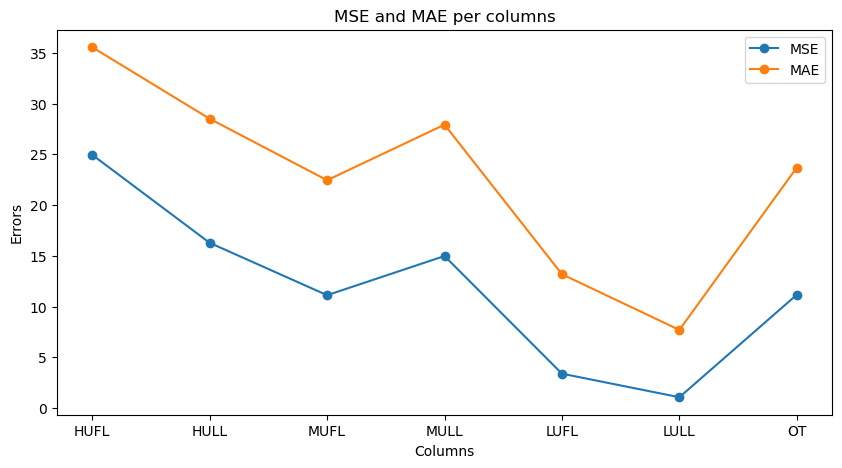

In [8]:
# Average metrics : average MSE and MAE
avg_mse = np.mean(mse_list)
avg_mae = np.mean(mae_list)

print(f"\nAverage MSE across all columns: {avg_mse}")
print(f"Average MAE across all columns: {avg_mae}")

## Results
plt.figure(figsize=(10, 5))
plt.plot(dataset.columns, mse_list, label="MSE", marker="o")
plt.plot(dataset.columns, mae_list, label="MAE", marker="o")
plt.title("MSE and MAE per columns")
plt.xlabel("Columns")
plt.ylabel("Errors")
plt.legend()
plt.show()